# 📈🔵**Interpolação - Matriz de Vandermonde**

Para a resolução das questões anteriores, em primeiro lugar, é preciso resolver a terceira questão, a qual propõe a criação de um código em Python que calcula o polinômio interpolador, via método de Vandermonde, a partir de um conjunto de dados.

Partindo do visto que foi visto em sala de aula, é possível estabelecer o seguinte código:

##### 📚**Importação de bibliotecas**

In [6]:
import numpy as np
import matplotlib.pyplot as plt


##### ✅**Eliminação Gaussiana para a resolução do sistema linear**

In [7]:
def resolucao_matriz_triangular_superior(matrizA, matrizB):
    tamanho = len(matrizA)
    solucao = np.zeros(tamanho)
    
    for linha in range(tamanho - 1, -1, -1):
        soma = 0
        for coluna in range(linha + 1, tamanho):
            soma += matrizA[linha][coluna] * solucao[coluna]
        
        solucao[linha] = (matrizB[linha] - soma) / matrizA[linha][linha]
        
    return solucao

def linha_mais_valiosa(MatrizA, tamanho, j):
    maior_valor = float("-inf")
    indice_maior_valor = tamanho
    for i in range(tamanho):
        if abs(MatrizA[i][j])> maior_valor:
            indice_maior_valor = i
            maior_valor = abs(MatrizA[i][j])
            
    return indice_maior_valor

def trocar_linha(MatrizA, MatrizB, linha, coluna):
    tamanho = len(MatrizA)
        
    linha_maior_valor_DP = linha_mais_valiosa(MatrizA, tamanho, coluna)
    
    MatrizA[[linha, linha_maior_valor_DP]] = MatrizA[[linha_maior_valor_DP, linha]]
    
    MatrizB[[linha, linha_maior_valor_DP]] = MatrizB[[linha_maior_valor_DP, linha]]
        
    return MatrizA, MatrizB

def eliminacao_gaussiana_com_pivotiamento(MatrizA, MatrizB): 
    # Considerando que os pontos podem ser definidos por coordenadas decimais (as quais podem ser elevadas ao cubo, a quarta potência, etc), é importante realizar o pivoteamento para evitar instabilidade nuérica.
    tamanho = len(MatrizA)
    
    Matriz_B_antes = MatrizB.copy()
    MatrizA, MatrizB = trocar_linha(MatrizA, MatrizB, tamanho-1, tamanho-1)
    Matriz_B_depois = MatrizB.copy()
    
    
    for i in range(tamanho):
        
        for j in range(i + 1, tamanho):
            mij = MatrizA[j][i] / MatrizA[i][i]
            MatrizB[j] = MatrizB[j] - mij * MatrizB[i]
            for k in range(i, tamanho):
                MatrizA[j][k] = MatrizA[j][k] - mij * MatrizA[i][k]
                
    resolucao = resolucao_matriz_triangular_superior(MatrizA, MatrizB)
    return Matriz_B_antes, Matriz_B_depois, resolucao


### 🔵 **Questão 3: Definição da Matriz de Vandermonde (e resolução do sistema linear)**

In [8]:
import numpy as np

def matriz_vandermonde(coordenadas_x, coordenadas_y):
    quantidade_de_pontos = len(coordenadas_x)
    matriz_b = np.array(coordenadas_y)
        
    # Definição da matriz de Vandermonde
    matriz_vandermonde = []
    for i in range(quantidade_de_pontos):
        linha = []
        for grau in range(quantidade_de_pontos):  # Grau varia de 0 até o número de pontos - 1 
            linha.append(coordenadas_x[i] ** grau) 
        matriz_vandermonde.append(linha)
    
    matriz_vandermonde = np.array(matriz_vandermonde)  # Converte para numpy array (para que o código da gaussiana possa ser utilizado)
    
    matriz_antes_do_pivoteamento = matriz_b.copy()
    # Resolução do sistema linear obtido 
    Matriz_b_antes_do_pivoteamento, Matriz_b_depois_do_pivoteamento, resolucao = eliminacao_gaussiana_com_pivotiamento(matriz_vandermonde, matriz_b)
    
    return Matriz_b_antes_do_pivoteamento, Matriz_b_depois_do_pivoteamento, resolucao

In [9]:
def matriz_vandermonde_interativo():
    "Apenas uma brincadeira para tornar o processo mais interativo com o usuário"
    quantidade_de_pontos = int(input("Qual é a quantidade de pontos?"))
    # Obtenção dos pontos 
    coordenadas_x = []
    matriz_b = []
    for i in range(quantidade_de_pontos):
        coordenada_x = float(input(f"Qual é a coordenada x para o ponto {i+1}? "))
        coordenadas_x.append(coordenada_x)
        
        coordenada_y = float(input(f"Qual é a coordenada y (valor de f(x)) para o ponto {i+1}? "))
        matriz_b.append([coordenada_y])
        
    # Definição da Matriz B (valores de f(x))
        
    matriz_b = np.array(matriz_b)
        
    # Definição da matriz de Vandermonde
    matriz_vandermonde = []
    for i in range(quantidade_de_pontos):
        linha = []
        for grau in range(quantidade_de_pontos):  
            linha.append(coordenadas_x[i] ** grau)
        matriz_vandermonde.append(linha)
    
    matriz_vandermonde = np.array(matriz_vandermonde) 
        
    # Resolução do sistema linear obtido
    Matriz_b_antes_do_pivoteamento, Matriz_b_depois_do_pivoteamento, resolucao = eliminacao_gaussiana_com_pivotiamento(matriz_vandermonde, matriz_b)
    
    return Matriz_b_antes_do_pivoteamento, Matriz_b_depois_do_pivoteamento, resolucao

Utilizando esse código, é possível resolver as demais questões :)

### 🔵**Questão 1**

Determine o polinômio interpolador que passa pelos pontos f(-1)=2, f(0)=-1 e f(1)=3, via método de matriz de Vandermonde.


In [10]:
x = [-1, 0, 1]
y = [2, -1, 3]
matriz_antes_pivoteamento, matriz_depois_pivoteamento, resolucao = matriz_vandermonde(x,y)
print(matriz_antes_pivoteamento)
print(matriz_depois_pivoteamento)
print(resolucao)

[ 2 -1  3]
[ 3 -1  2]
[-1.   0.5  3.5]


Os código, então, nos indica o polinômio que pode ser obtido. No entanto, é preciso tomar certo cuidado: Em razão do pivoteamento, as linhas do resultado final podem estar trocadas. Dessa forma, é preciso analisar exatamente como a troca dos coeficientes foi realizada. No caso em questão, os coeficientes $a0$ e $a2$ foram trocados. Portanto, o polinômio que melhor descreve esses pontos é dado por: $3.5 + -x + 0.5x^2$

### 🔵**Questão 2**

Considere a tabela de dados abaixo:


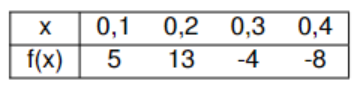

a) Utilize o método de Vandermonde para determinar o polinômio interpolador que passa pelo conjunto de dados acima.

In [11]:
x2 = [0.1, 0.2, 0.3, 0.4]
y2 = [5, 13, -4, -8]
matriz_antes_pivoteamento, matriz_depois_pivoteamento, resolucao = matriz_vandermonde(x2,y2)
print(matriz_antes_pivoteamento)
print(matriz_depois_pivoteamento)
print(resolucao)

[ 5 13 -4 -8]
[ 5 13 -4 -8]
[  -66.          1151.66666667 -5050.          6333.33333333]


Considerando os coeficientes acima, temos que o polinômio pode ser dado por: $-66 + 1151.67x - 5050x^2 + 6333.33x^3$

b) Plote o polinômio interpolador e os dados em um mesmo gráfico. O que você pode perceber na imagem plotada? O que você tiraria de conclusão do que observou.

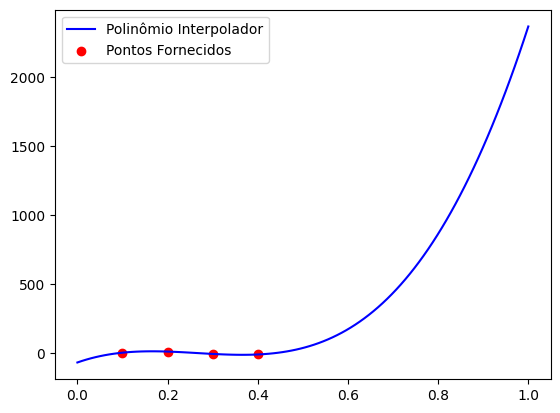

In [21]:
plt.style.use('default')
figura, eixo = plt.subplots()

x = np.linspace(0, 1, 100)

y = -66 + 1151.67 * x - 5050 * x**2 + 6333.33 * x**3

eixo.plot(x, y, color="blue",label="Polinômio Interpolador")
eixo.scatter(x2, y2, color='red', label="Pontos Fornecidos")


eixo.legend()

plt.show()


É possível concluir que os pontos estão perfeitamente ajustados pela função fornecida. Isso demonstra que o método de Vandermonde é capaz de descrever com exatidão o comportamento de um conjunto específico de dados. No entanto, vale salientar que esse método não garante a mesma precisão para outros pontos fora do conjunto, nem leva em consideração imprecisões ou outliers (em casos de dados experimentais).

### 🔵 **Questão Bônus**

Para finalizar o conteúdo de decomposição de matrizes, vamos retornar ao jogo Super Trunfo Matricial. No jogo Super Trunfo Matricial algumas cartas tinham um símbolo que as tornavam mais "fortes" que o super trunfo. Esses símbolos estão associados a características ou critérios que tornam o método viável ou criam boas condições para seu uso. No caso, os símbolos foram:

(S) - critério de Sassenfeld - associada a carta Gauss-Seidel

(PD) - Positiva definida - associada a carta Cholesky

(O) - Ortogonal - associada a carta QR

Por meio da dinâmica speed run conecte os três conceitos destacados acima, isto é: comece com Método de Gauss-Seidel, passe pela Fatoração de Cholesky e chegue em Decomposição QR. Utilize essa busca para explicar o motivo pelo qual as características S, PD e O tornam respectivamente os métodos Gauss-Seidel, Cholesky e QR viáveis.


**(1° Etapa): Gauss - Seidel**
O *Critério de Sassenfeld* possui um papel semelhante ao critério das linhas, sendo responsável por verificar se o sistema linear irá convergir ou não por meio do método de Gauss-Seidel - método iterativo que, diferentemente do Gauss-Jacobi, atualiza o vetor de chute a cada iteração, utilizando as atualizações mais recentes. No entanto, diferentemente deste último, o critério de Sassenfeld tem maior abrangência, podendo ser utilizado mesmo quando o critério das linhas não é satisfeito.

A lógica do critério de Sassenfeld é bastante simples: para cada linha da matriz, o módulo de todos os elementos, exceto o elemento da diagonal principal, é somado. Essa soma $Bi$ é, então, dividida pelo módulo do elemento da diagonal principal. O critério estabelece que, se o valor resultante para cada linha for menor que 1, o método de Gauss-Seidel convergirá para uma solução. Isso é especialmente útil em casos nos quais a matriz não é *dominante na diagonal principal*.

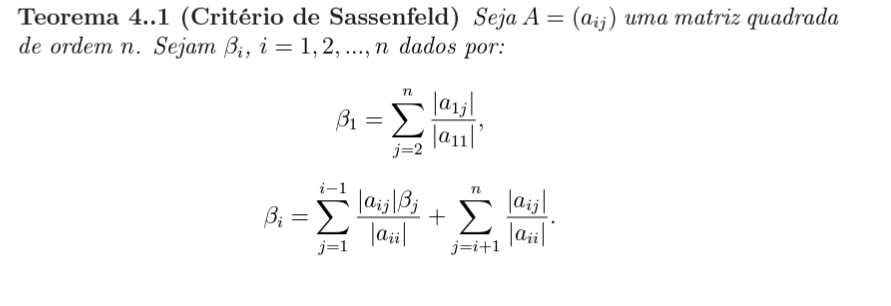    
[1: Critério de Sassenfeld]

**(2° Etapa): Fatoração Cholesky** O método Gauss-Seidel é especialmente útil para resolver sistemas lineares grandes e/ou esparsos, nos quais métodos diretos, como a *Decomposição LU* podem ser difíceis (ou até mesmo impossíveis) de serem implementados. Como situação "ideal" para a realização do método LU, temos a *Fatoração Cholesky* , a qual pode ser utilizado em matrizes simétricas e *positivas definidas (PD)* - isto é, se $Aji = Aij$ e se todos os menores principais da matriz tiverem determinante positivo (Critério de Sylvestre). Essa decomposição [Figura 3] pode ser dada por $LL^T$, onde L se configura como a matriz triangular inferior. Em situações de convergência do método Gauss-Seidel, vale a pena verificar se o sistema pode ser mais facilmente resolvido por Cholesky.

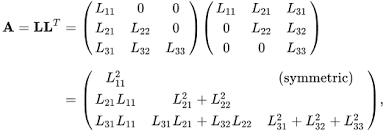

[2: Fatoração de Cholesky]

**(3° Etapa): Decomposição QR** O método de fatoração Cholesky, apesar de ser facilmente aplicado, possui diversas restrições, podendo apenas ser aplicado em situações bem específicas (matrizes simétricas e positivas definidas). Dessa forma, para a resolução de sistemas menos comportados,  a *Decomposição QR* pode ser utilizada, a qual apresenta menos propensão a estabilidade numérica do que outros métodos. Em síntese, esse método consiste na decomposição de uma matriz $A$ no produto $QR$, onde Q é uma matriz *ortogonal* ($Q^TQ = I$) e $R$ é uma matriz triangular superior. Diversos métodos podem ser utilizados para a obtenção dessa fatoração [4], tais como  Gram–Schmidt, Reflexão de Householder e Transformações de Givens. De toda forma, a ortogonalidade desempenha o importante papel de garantir que a decomposição QR  possua maior estabilidade numérica, podendo fornecer soluções válidas mesmo em matrizes mal condicionadas, ao preservar os comprimentos dos vetores e seus produtos escalares (ou seja, preservar a norma). Geralmente, esse método é utilizado para resolver probelmas de mínimos quadrados lineares.

### 🗂️**Referências!**

[1] Gauss-Seidel, Critério de Sassenfeld e Soma por Linhas - Exercícios resolvidos de Cálculo Numérico. https://www.tudoengcivil.com.br/2014/10/gauss-seidel-criterio-de-sassenfeld-e.html. Acesso em 10 de outubro de 2024.

[2] “Gauss–Seidel Method”. Wikipedia, 25 de setembro de 2024. Wikipedia, https://en.wikipedia.org/w/index.php?title=Gauss%E2%80%93Seidel_method&oldid=1247702065.

[3] “Fatoração de Cholesky”. Wikipédia, a enciclopédia livre, 30 de julho de 2023. Wikipedia, https://pt.wikipedia.org/w/index.php?title=Fatora%C3%A7%C3%A3o_de_Cholesky&oldid=66341631.

[4] “Decomposição QR”. Wikipédia, a enciclopédia livre, 31 de dezembro de 2020. Wikipedia, https://pt.wikipedia.org/w/index.php?title=Decomposi%C3%A7%C3%A3o_QR&oldid=60137325.